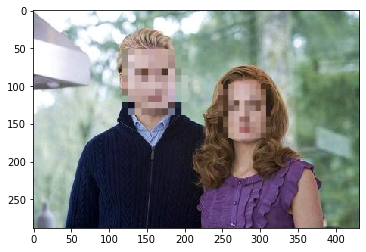

In [8]:
import matplotlib.pyplot as plt
import cv2
#from mosaic import mosaic as mosaic

def mosaic(img, rect, size):
    #モザイクをかける領域を取得
    (x1,y1,x2,y2)=rect
    w=x2-x1
    h=y2-y1
    i_rect = img[y1:y2,x1:x2]
    #一度縮小して拡大する
    i_small=cv2.resize(i_rect,(size,size))
    i_mos = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA)
    #画像にモザイク画像を重ねる
    img2=img.copy()
    img2[y1:y2,x1:x2]=i_mos
    return img2

%matplotlib inline

#カスケードファイルを指定して検出器を作成
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

#画像の読み込んでグレイスケールに変換する
img = cv2.imread("3_2_4_test2.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#顔検出を実行
face_list = cascade.detectMultiScale(img_gray, minSize=(10,10))
if len(face_list)==0: quit()

#認識した部分の画像にモザイクをかける
for(x,y,w,h) in face_list:
    img = mosaic(img, (x,y,x+w,y+h),10)
    
#モザイクをかけた画像を出力
cv2.imwrite("3_2_4_test_mosaic.png",img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()